# Modelo 1er. parcial
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/Ejercitacion/pm1.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Ejercicio 1

<img src="pm1/pm1-01.png">

__Falso__, si bien la figura representa una impedancia resistiva-capacitiva, la razón por la que lo es no tiene relación con que el voltaje comienze en cero en el orígen de coordenadas, sino con el hecho de que la corriente está retrasada con respecto al voltaje.

__Graficando con python (opcional)__

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = 50 # Hz
w = 2*np.pi*f
def va(t):
  return (220*np.sqrt(2))*np.sin(w*t)

def ia(t):
  return (10*np.sqrt(2))*np.sin(w*t - np.pi/4)

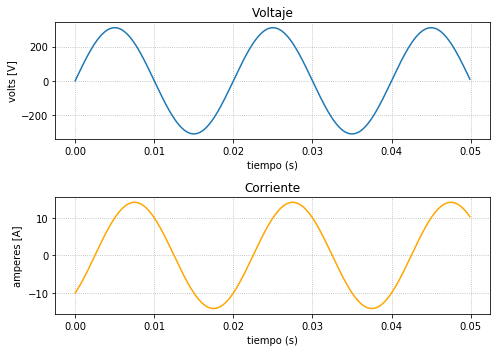

In [3]:
%matplotlib inline
plt.figure(figsize=(7,5))

t = np.arange(0, 0.05 , 0.0001)

plt.subplot(211)
plt.plot(t, va(t))
plt.title('Voltaje')
plt.xlabel('tiempo (s)')
plt.ylabel('volts [V]')
plt.grid(linestyle=":")
plt.subplot(212)
plt.plot(t, ia(t), color='orange')
plt.title('Corriente')
plt.xlabel('tiempo (s)')
plt.ylabel('amperes [A]')
plt.grid(linestyle=":")

plt.tight_layout()
plt.draw()
plt.show()

In [4]:
%reset -s -f

## Ejercicio 2

<img src="pm1/pm1-02.png">

$$ Z = {U \over I} = {100 \angle 90^\circ \, \mathrm{V} \over 100 \angle 135^\circ \, \mathrm{A}} = 1 \angle -45^\circ \, \Omega $$

## Ejercicio 3

<img src="pm1/pm1-03.png">

$$ Z_{eq} = [(Z_4 // Z_3) + Z_2] // Z_1  $$

$$ Z' = \frac{Z_3 \cdot Z_4}{Z_3 + Z_4} $$

$$ Z'' = Z' + Z_2 $$

Entonces
$$ Z_{eq} = \frac{Z'' \cdot Z_4}{Z'' + Z_4} $$

## Ejercicio 4

<img src="pm1/pm1-04.png">

In [5]:
# Datos
Z1 = 7 + 100j # Ohm
Z2 = 2 + 100j # Ohm
Z3 = 10 + 0j # Ohm
Z4 = 10 + 0j # Ohm
U = 500 # V
f = 50 # Hz

In [6]:
# función que calcula elementos en paralelo
def prl(x,y):
    return (x*y)/(x + y)

In [7]:
# Cálculo de Zeq
Zeq = prl( prl(Z4,Z3) + Z2 , Z1 )

In [8]:
print('Zeq = {:.1f} Ohm'.format(Zeq))

Zeq = 3.5+50.0j Ohm


## Ejercicio 5

<img src="pm1/pm1-05.png">

In [9]:
# Cálculo de I1
I1 = U/Zeq
# Cálculo de potencia
S = U*I1.conjugate()
P = S.real
Q = S.imag

In [10]:
print('Resultados:')
print(' S  = {:.2f} VA'.format(S))
print('|S| = %.1f VA'%(abs(S)))
print(' P  = %.2f W'%P)
print(' Q  = %.2f VAr'%Q)

Resultados:
 S  = 348.29+4975.62j VA
|S| = 4987.8 VA
 P  = 348.29 W
 Q  = 4975.62 VAr


## Ejercicio 6

<img src="pm1/pm1-06.png">

Estado compensado
$$ |I_2| = |I_1| \cdot 0,10 $$

In [11]:
I2 = abs(I1)*0.1

Cálculo de $\varphi_1$

In [12]:
import math, cmath

In [13]:
phi1 = cmath.phase(I1)

In [14]:
print('phi1 = %.2f°'%(math.degrees(phi1)))

phi1 = -86.00°


Cálculo de $\varphi_2$
$$ P_1 = P_2 $$

$$ U I_1 \cos \varphi_1 = U I_2 \cos \varphi_2 $$

$$ \varphi_2 = \arccos \frac{|I_1| \cos \varphi_1}{|I_2|} $$

In [15]:
phi2 = math.acos( abs(I1)*math.cos(phi1)/ I2 )

In [16]:
print('phi2 = %.2f°'%(math.degrees(phi2)))

phi2 = 45.71°


Cálculo de $Q_2$
$$ Q_2 = U \cdot I_2 \sin \varphi_2 $$

In [17]:
Q2 = U*I2*math.sin(phi2)

In [18]:
print('Q2 = %.2f VAr'%Q2)

Q2 = 357.03 VAr


Cálculo de $Q_C$
$$ Q_C = Q_1 - Q_2 $$

In [19]:
Qc = Q - Q2

In [20]:
print('Qc = %.2f VAr'%Qc)

Qc = 4618.59 VAr


$$ Q_C = \frac{U^2}{X_C} = \frac{U^2}{1/(\omega C)} = U^2 \omega C $$

Cálculo de $C$
$$ C = \frac{Q_C}{\omega U^2} = \frac{Q_C}{2 \pi f U^2} $$

In [21]:
C = Qc/(2*math.pi*f*U**2)

In [22]:
print('C = %.2f uF'%(C*1e6))

C = 58.81 uF


In [23]:
%reset -s -f

## Ejercicio 7

<img src="pm1/pm1-07.png">

$$ Z_{th} = \frac{Z_1 \cdot Z_2}{Z_1 + Z_2} + Z_3 $$

## Ejercicio 8

<img src="pm1/pm1-08.png">

In [24]:
# Datos:
Z1 = 0 + 2j # Ohm
Z2 = Z1
Z3 = 1 + 15j # Ohm
U = 100 # V

In [25]:
# Cálculo de Zth
Zth = (Z1*Z2)/(Z1 + Z2) + Z3

In [26]:
print('Zth = {:.0f} Ohm'.format(Zth))

Zth = 1+16j Ohm


## Ejercicio 9

<img src="pm1/pm1-09.png">

$Z_{eq} = Z_1 + Z_2$
$$ I_1 = \frac{U}{Z_{eq}} $$

Entonces
$$ U_{th} = I_1 \cdot Z_2 $$

o también
$$ U_{th} = \frac{Z_1 \cdot U}{Z_1 + Z_2} $$

## Ejercicio 10

<img src="pm1/pm1-10.png">

In [27]:
# Cálculo de Zeq
Zeq = Z1 + Z2
# Cálculo de I
I = U/Zeq
# Cálculo de Uth
Uth = I*Z2

In [28]:
print('Uth = {:.1f} Ohm'.format(Uth))

Uth = 50.0+0.0j Ohm


In [29]:
%reset -s -f

-----------
<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/Ejercitacion/pm1.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>